In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
optimum = {}

best = pd.read_csv('data/adapt_best.csv')
for ((size, pin), group) in best.groupby(['size', 'pin']):
    best_energy = group['energy'].min()
    best_row = group[group['energy'].eq(best_energy)].iloc[0]
    optimum[(int(size),bool(pin))] = int(best_row['threads'])

optimum[(1500,False)] = 8
optimum[(1500,True)] = 12

print(optimum)

{(500, False): 16, (500, True): 16, (550, False): 16, (550, True): 16, (600, False): 16, (600, True): 16, (650, False): 16, (650, True): 16, (700, False): 16, (700, True): 16, (750, False): 16, (750, True): 16, (800, False): 16, (800, True): 15, (850, False): 15, (850, True): 16, (900, False): 16, (900, True): 16, (950, False): 16, (950, True): 15, (1000, False): 14, (1000, True): 16, (1050, False): 16, (1050, True): 16, (1100, False): 8, (1100, True): 12, (1150, False): 15, (1150, True): 15, (1200, False): 8, (1200, True): 12, (1250, False): 8, (1250, True): 12, (1300, False): 8, (1300, True): 12, (1350, False): 8, (1350, True): 12, (1400, False): 8, (1400, True): 12, (1450, False): 8, (1450, True): 12, (1500, False): 8, (1500, True): 12}


In [31]:
fast = pd.read_csv('data/adapt_fast.csv')
slow = pd.read_csv('data/adapt_slow.csv')
slow

,size,pin,threads,runtime,usertime,energy
0,800,False,16,0.197527,3.100895,8.456460
1,800,False,16,0.195710,3.077067,8.412637
2,800,False,16,0.195257,3.074616,8.373758
3,800,False,16,0.195565,3.075924,8.398843
4,800,False,16,0.195810,3.075685,8.379434
...,...,...,...,...,...,...
3995,800,True,16,0.197701,3.113699,8.798562
3996,800,True,16,0.197941,3.109916,8.789467
3997,800,True,16,0.197767,3.109206,8.758217
3998,800,True,16,0.198264,3.114444,8.797585


In [32]:
fast['optimum'] = fast.apply(lambda x: optimum[(x['size'], x['pin'])], axis=1)
slow['optimum'] = slow.apply(lambda x: optimum[(x['size'], x['pin'])], axis=1)

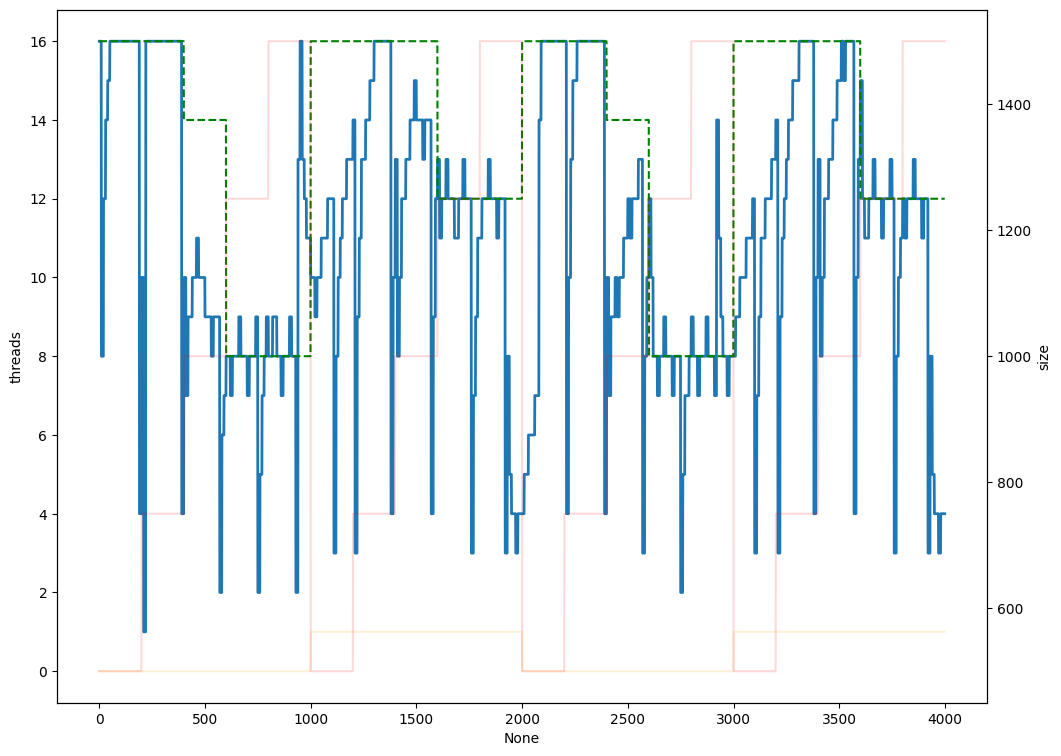

In [33]:
plt.figure(figsize=(12,9))

x = fast.index

ax = sns.lineplot(x=x, y=fast['threads'], linewidth=2)
sns.lineplot(x=x, y=fast['optimum'], color='g', linestyle='--', ax=ax)

sns.lineplot(x=x, y=fast['pin'], color='orange', alpha=0.15, ax=ax)

ax2 = ax.twinx()

sns.lineplot(x=x, y=fast['size'], color='r', alpha=0.15, ax=ax2)

plt.savefig('images/adapt_fast.png')
plt.show()

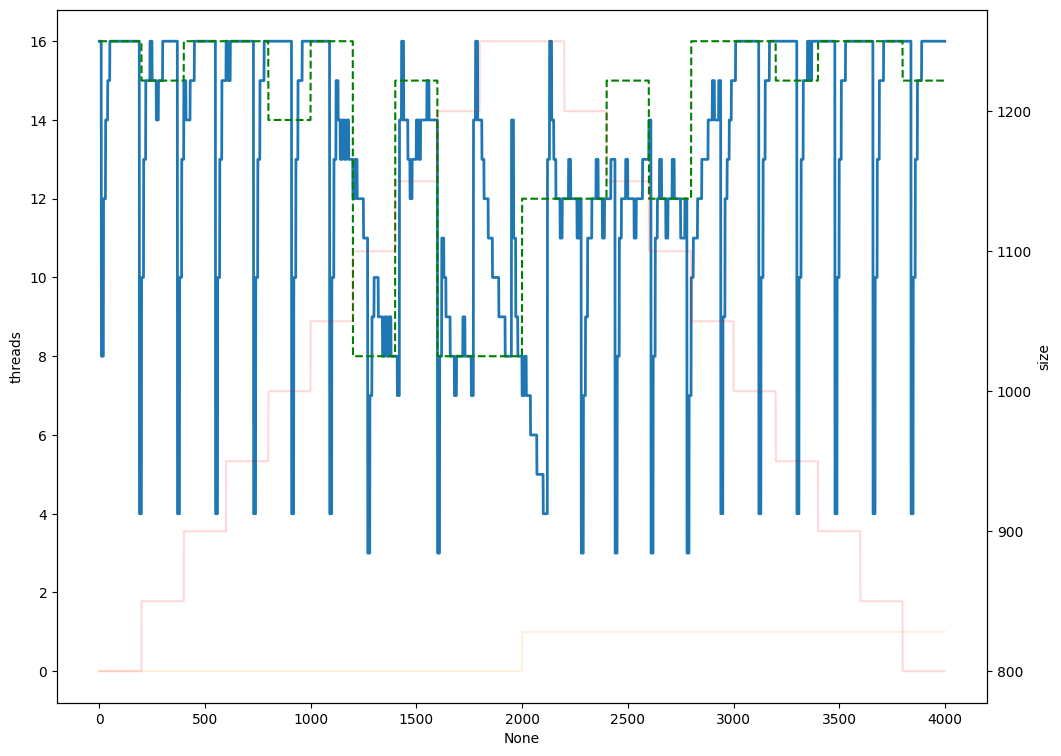

In [34]:
plt.figure(figsize=(12,9))

x = slow.index

ax = sns.lineplot(x=x, y=slow['threads'], linewidth=2)
sns.lineplot(x=x, y=slow['optimum'], color='g', linestyle='--', ax=ax)

sns.lineplot(x=x, y=slow['pin'], color='orange', alpha=0.15, ax=ax)

ax2 = ax.twinx()

sns.lineplot(x=x, y=slow['size'], color='r', alpha=0.15, ax=ax2)

plt.savefig('images/adapt_slow.png')
plt.show()

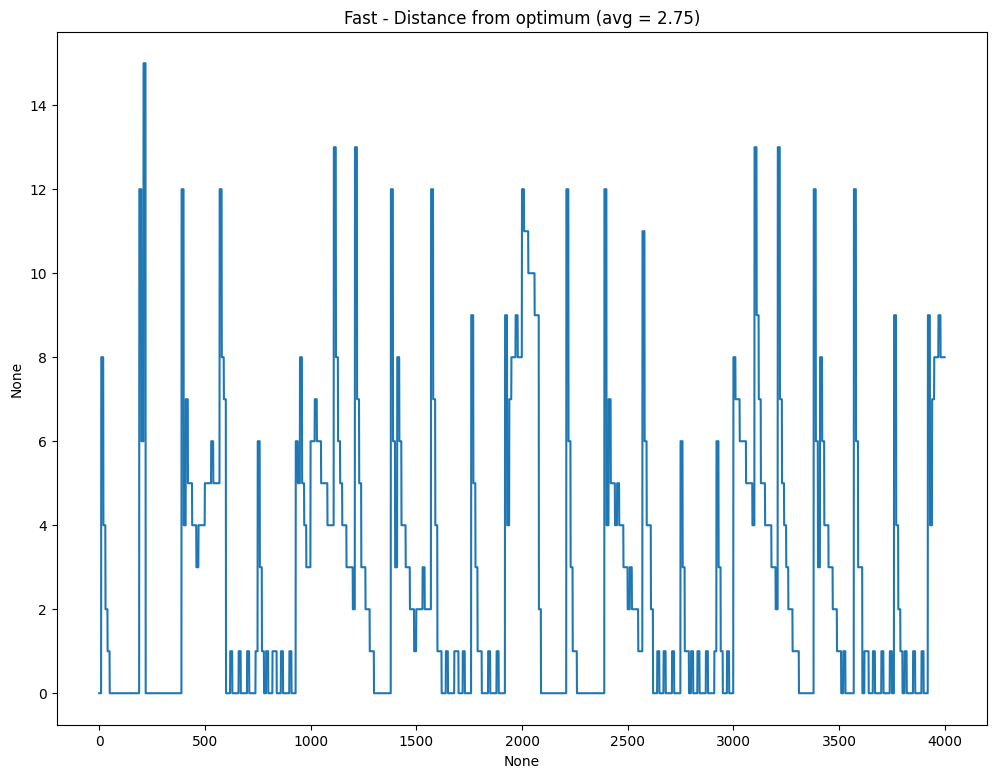

In [35]:
plt.figure(figsize=(12,9))
dt = fast['threads'].sub(fast['optimum']).abs()
sns.lineplot(x=fast.index, y=dt)
plt.title(f'Fast - Distance from optimum (avg = {dt.sum() / len(dt)})')
plt.show()

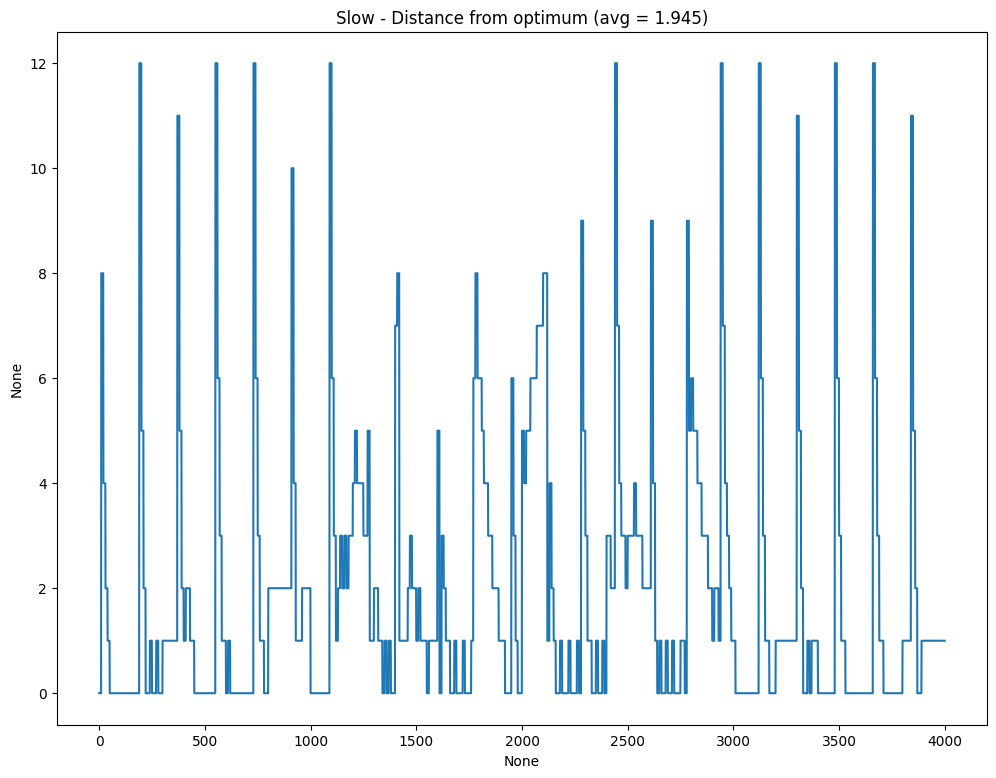

In [36]:
plt.figure(figsize=(12,9))
dt = slow['threads'].sub(slow['optimum']).abs()
sns.lineplot(x=slow.index, y=dt)
plt.title(f'Slow - Distance from optimum (avg = {dt.sum() / len(dt)})')
plt.show()